QUESTION 1

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

#fitering warnings
import warnings
warnings.filterwarnings('ignore')



In [243]:
df = pd.read_csv('anneal.data', header=None)
#naming columns acc to anneal.names
df.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class']
#dopping product-type column
df = df.drop('product-type', axis=1)
df = df.replace('?', np.nan)
#filling na for steel column
df['steel'] = df['steel'].fillna(df['steel'].mode()[0]) 
#dropping all the columns conatining null values
df = df.dropna(axis=1)
df

steel  carbon  hardness  strength  shape   thick   width   len  bore class
0       2       3         4         8     31  32.000    33.0    34    36    38
1       A       8         0         0   COIL   0.700   610.0     0     0     3
2       R       0         0         0   COIL   3.200   610.0     0     0     3
3       R       0         0         0  SHEET   0.700  1300.0   762     0     3
4       A       0        60         0   COIL   2.801   385.1     0     0     3
..    ...     ...       ...       ...    ...     ...     ...   ...   ...   ...
794     A       0        50         0   COIL   1.001    50.0     0     0     3
795     A       0         0         0  SHEET   0.699  1300.0  4880     0     3
796     A       0         0         0   COIL   0.400   609.9     0     0     3
797     A       0         0         0  SHEET   3.200   610.0  4880     0     3
798     R       0         0         0  SHEET   1.599  1500.0  4170     0     2

[799 rows x 10 columns]

In [244]:
#performing same with anneal.test
df_test = pd.read_csv('anneal.test', header=None)
df_test.columns = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class']
df_test = df_test.replace('?', np.nan)
df_test['steel'] = df_test['steel'].fillna(df_test['steel'].mode()[0]) 
df_test = df_test.dropna(axis=1)
df_test

product-type steel  carbon  hardness  strength  shape   thick  width  len  \
0              1     2       3         4         8     31  32.000   33.0   34   
1              C     A       0        45         0   COIL   1.600  610.0    0   
2              C     A       0         0         0   COIL   0.699  609.9    0   
3              C     A       0        85         0  SHEET   0.400  610.0  762   
4              C     A       0        50         0   COIL   0.400  610.0    0   
..           ...   ...     ...       ...       ...    ...     ...    ...  ...   
96             C     R       0         0         0  SHEET   1.599  610.0  762   
97             C     R       0         0         0  SHEET   1.601  830.0  880   
98             C     V       0         0         0  SHEET   1.599  150.0  762   
99             C     A       0        85         0   COIL   0.400   20.0    0   
100            C     A       0        85         0   COIL   4.000  610.0    0   

     bore class  
0      36    38  
1       0     3  
2       0     3  
3       0     U  
4       0     3  
..    ...   ...  
96      0     2  
97      0     2  
98      0     2  
99      0     U  
100   500     U  

[101 rows x 11 columns]

part 2

In [245]:
#preprocessing the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df_test['class'] = le.fit_transform(df_test['class'])
y_data = df['class']
X_data = df.drop('class', axis=1)
#dropping first row
X_data = X_data.drop(X_data.index[0])
y_data = y_data.drop(y_data.index[0])
X_data

steel  carbon  hardness  strength  shape  thick   width   len  bore
1       A       8         0         0   COIL  0.700   610.0     0     0
2       R       0         0         0   COIL  3.200   610.0     0     0
3       R       0         0         0  SHEET  0.700  1300.0   762     0
4       A       0        60         0   COIL  2.801   385.1     0     0
5       A       0        60         0  SHEET  0.801   255.0   269     0
..    ...     ...       ...       ...    ...    ...     ...   ...   ...
794     A       0        50         0   COIL  1.001    50.0     0     0
795     A       0         0         0  SHEET  0.699  1300.0  4880     0
796     A       0         0         0   COIL  0.400   609.9     0     0
797     A       0         0         0  SHEET  3.200   610.0  4880     0
798     R       0         0         0  SHEET  1.599  1500.0  4170     0

[798 rows x 9 columns]

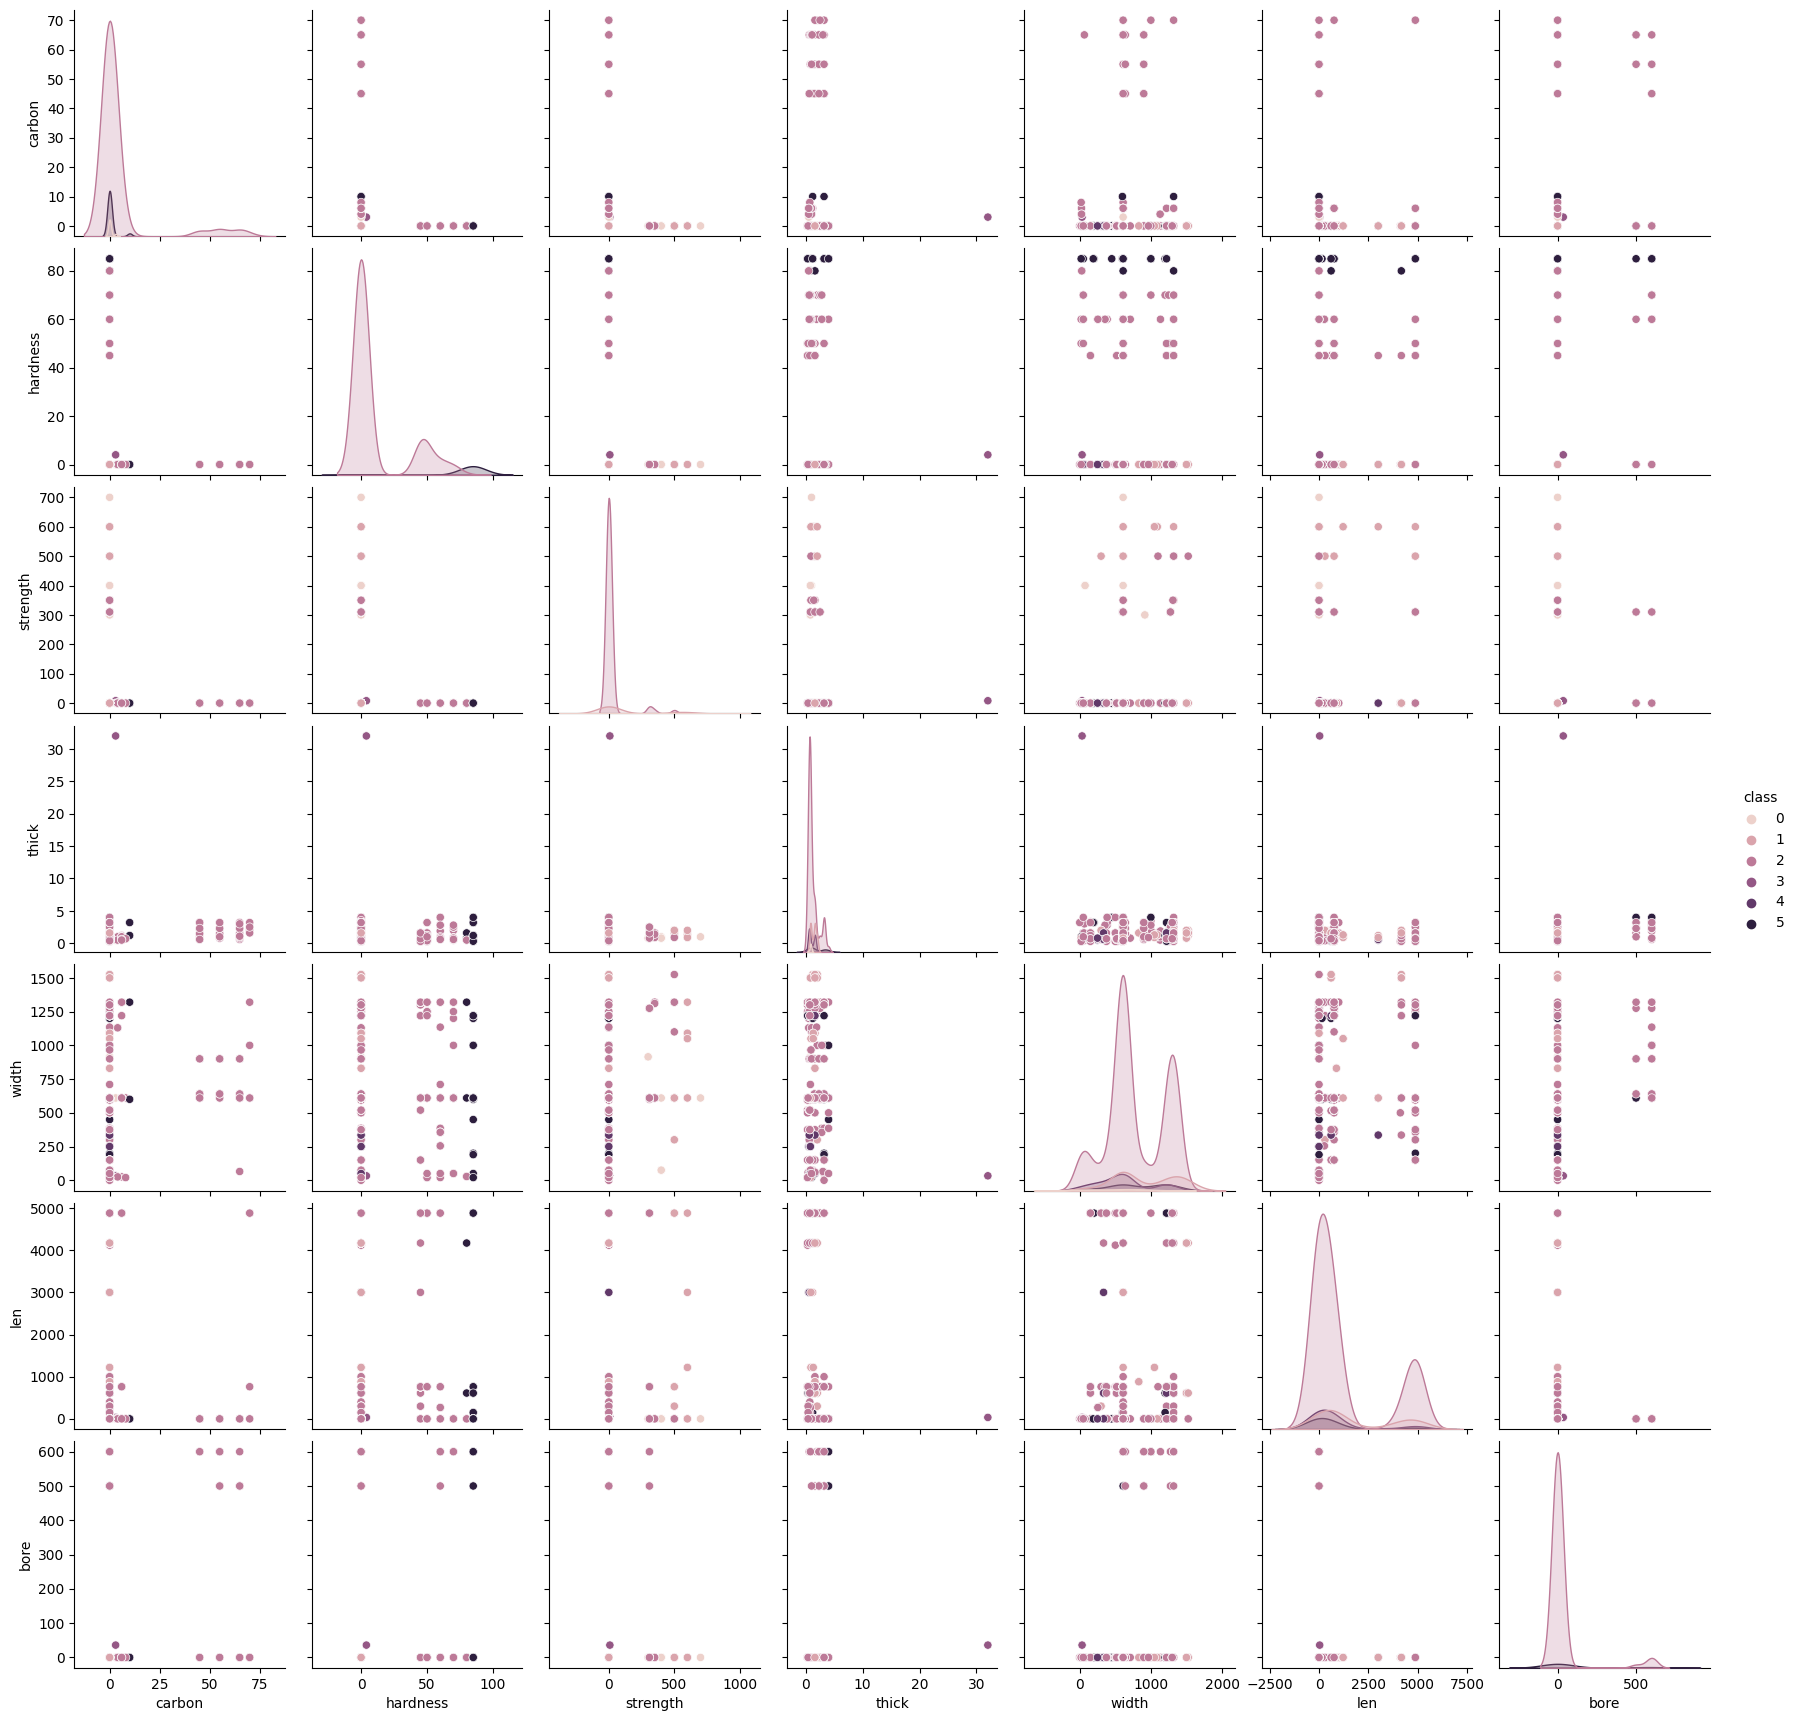

In [246]:
#visualizing the data
sns.pairplot(df, hue='class')

<AxesSubplot: >

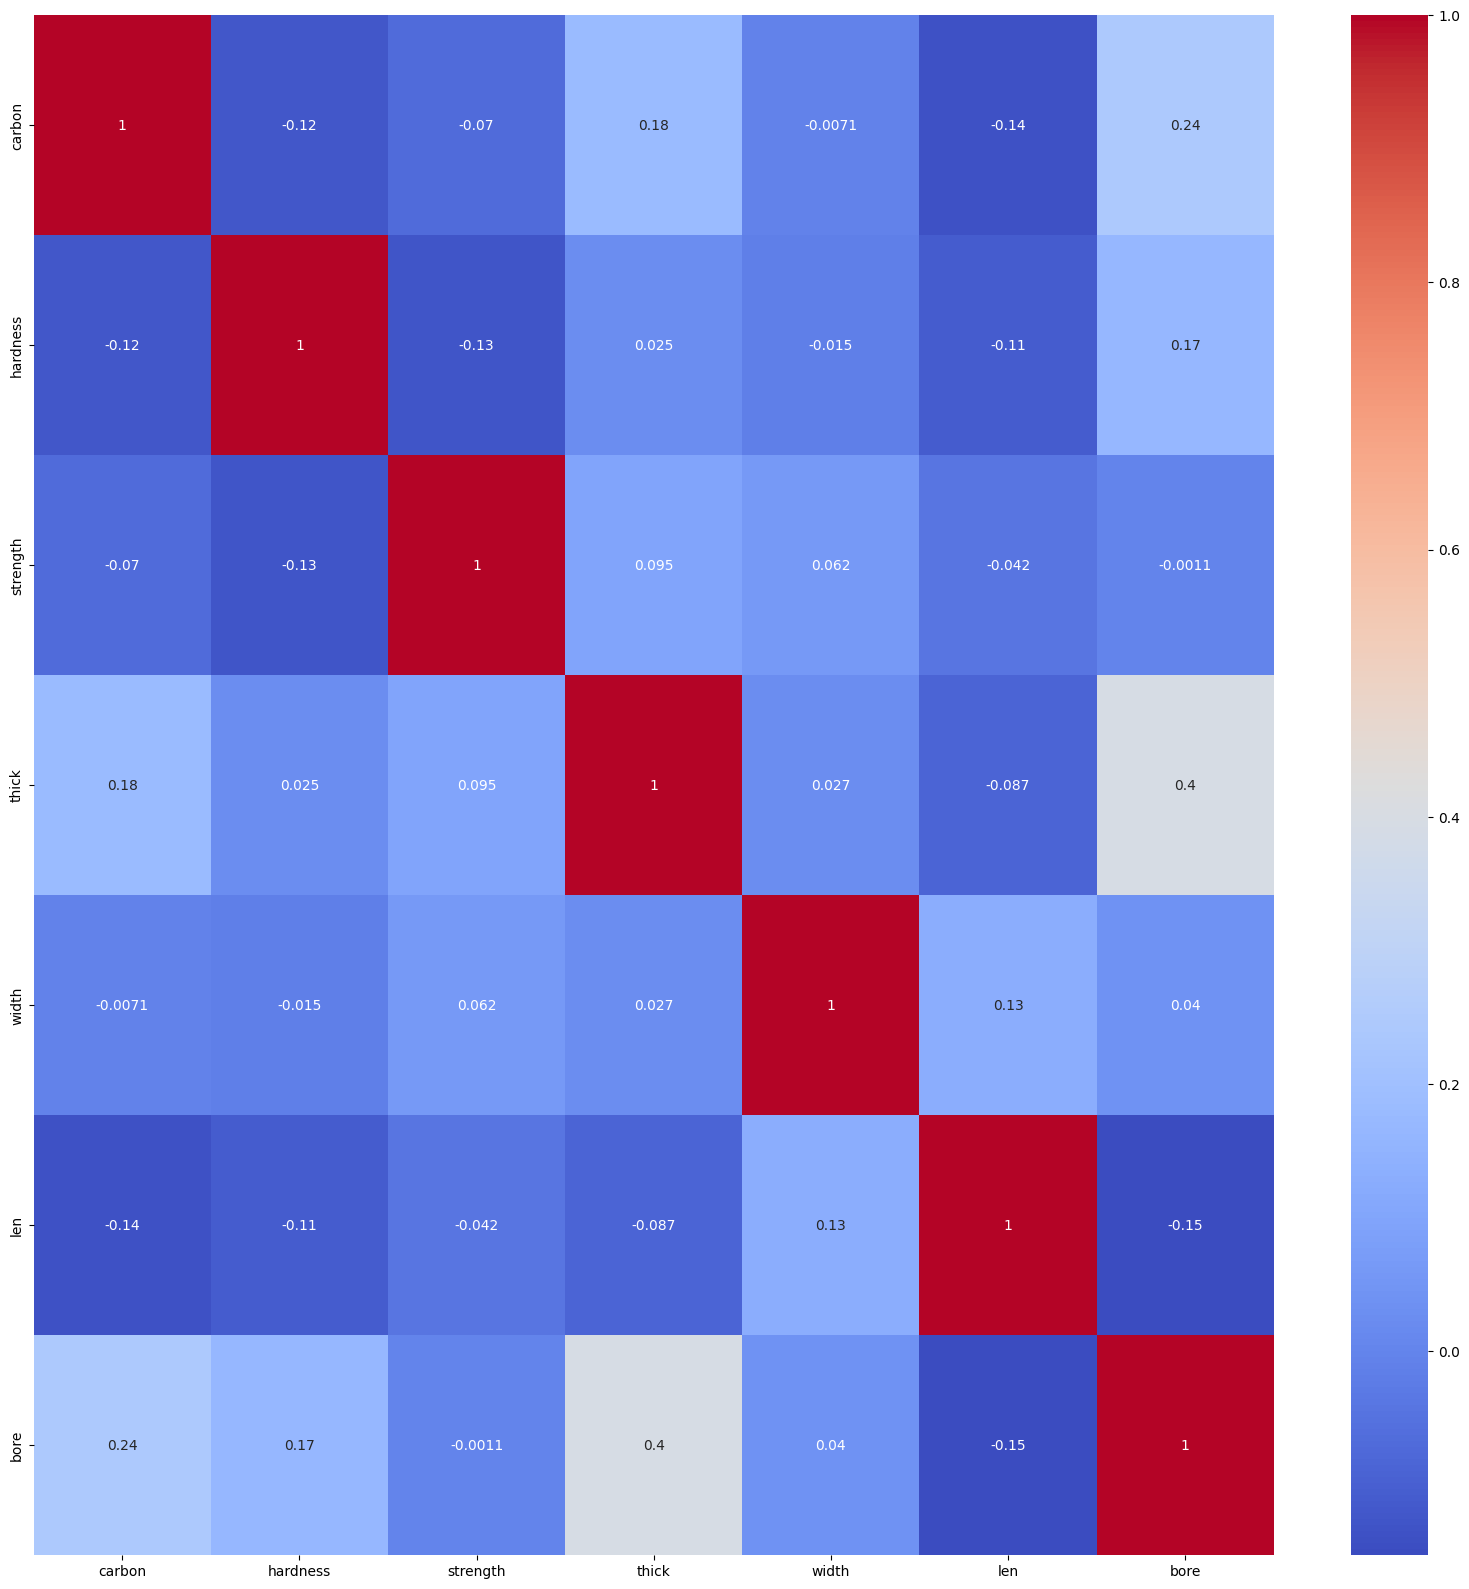

In [247]:
#plotting the heatmap with correlation
plt.figure(figsize=(20,20))
sns.heatmap(X_data.corr(), annot=True, cmap='coolwarm')


In [248]:
X_data = pd.get_dummies(X_data)
X_data


carbon  hardness  strength  thick   width   len  bore  steel_A  steel_K  \
1         8         0         0  0.700   610.0     0     0        1        0   
2         0         0         0  3.200   610.0     0     0        0        0   
3         0         0         0  0.700  1300.0   762     0        0        0   
4         0        60         0  2.801   385.1     0     0        1        0   
5         0        60         0  0.801   255.0   269     0        1        0   
..      ...       ...       ...    ...     ...   ...   ...      ...      ...   
794       0        50         0  1.001    50.0     0     0        1        0   
795       0         0         0  0.699  1300.0  4880     0        1        0   
796       0         0         0  0.400   609.9     0     0        1        0   
797       0         0         0  3.200   610.0  4880     0        1        0   
798       0         0         0  1.599  1500.0  4170     0        0        0   

     steel_M  steel_R  steel_S  steel_V  steel_W  shape_COIL  shape_SHEET  
1          0        0        0        0        0           1            0  
2          0        1        0        0        0           1            0  
3          0        1        0        0        0           0            1  
4          0        0        0        0        0           1            0  
5          0        0        0        0        0           0            1  
..       ...      ...      ...      ...      ...         ...          ...  
794        0        0        0        0        0           1            0  
795        0        0        0        0        0           0            1  
796        0        0        0        0        0           1            0  
797        0        0        0        0        0           0            1  
798        0        1        0        0        0           0            1  

[798 rows x 16 columns]

In [249]:
#standardizing the data and making new dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data_st = scaler.fit_transform(X_data)
X_data_st = pd.DataFrame(X_data_st, columns=X_data.columns)
X_data_st

carbon  hardness  strength     thick     width       len      bore  \
0    0.327764 -0.477458 -0.267167 -0.559593 -0.424617 -0.675142 -0.226046   
1   -0.261159 -0.477458 -0.267167  2.343780 -0.424617 -0.675142 -0.226046   
2   -0.261159 -0.477458 -0.267167 -0.559593  1.281325 -0.271023 -0.226046   
3   -0.261159  1.961015 -0.267167  1.880402 -0.980655 -0.675142 -0.226046   
4   -0.261159  1.961015 -0.267167 -0.442296 -1.302312 -0.532481 -0.226046   
..        ...       ...       ...       ...       ...       ...       ...   
793 -0.261159  1.554602 -0.267167 -0.210027 -1.809150 -0.675142 -0.226046   
794 -0.261159 -0.477458 -0.267167 -0.560754  1.281325  1.912914 -0.226046   
795 -0.261159 -0.477458 -0.267167 -0.907997 -0.424864 -0.675142 -0.226046   
796 -0.261159 -0.477458 -0.267167  2.343780 -0.424617  1.912914 -0.226046   
797 -0.261159 -0.477458 -0.267167  0.484460  1.775800  1.536373 -0.226046   

      steel_A   steel_K   steel_M   steel_R   steel_S   steel_V   steel_W  \
0    0.841890 -0.241569 -0.147536 -0.638285 -0.106803 -0.128688 -0.147536   
1   -1.187803 -0.241569 -0.147536  1.566699 -0.106803 -0.128688 -0.147536   
2   -1.187803 -0.241569 -0.147536  1.566699 -0.106803 -0.128688 -0.147536   
3    0.841890 -0.241569 -0.147536 -0.638285 -0.106803 -0.128688 -0.147536   
4    0.841890 -0.241569 -0.147536 -0.638285 -0.106803 -0.128688 -0.147536   
..        ...       ...       ...       ...       ...       ...       ...   
793  0.841890 -0.241569 -0.147536 -0.638285 -0.106803 -0.128688 -0.147536   
794  0.841890 -0.241569 -0.147536 -0.638285 -0.106803 -0.128688 -0.147536   
795  0.841890 -0.241569 -0.147536 -0.638285 -0.106803 -0.128688 -0.147536   
796  0.841890 -0.241569 -0.147536 -0.638285 -0.106803 -0.128688 -0.147536   
797 -1.187803 -0.241569 -0.147536  1.566699 -0.106803 -0.128688 -0.147536   

     shape_COIL  shape_SHEET  
0      1.083691    -1.083691  
1      1.083691    -1.083691  
2     -0.922772     0.922772  
3      1.083691    -1.083691  
4     -0.922772     0.922772  
..          ...          ...  
793    1.083691    -1.083691  
794   -0.922772     0.922772  
795    1.083691    -1.083691  
796   -0.922772     0.922772  
797   -0.922772     0.922772  

[798 rows x 16 columns]

In [250]:
#spilliting the dataset in 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.35, random_state=42)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_data_st, y_data, test_size=0.35, random_state=42)

part 3

In [251]:
#comparing 3-classifier models with and without standardization of data and comapring the results and one is SVM classifier other two are decision tree classifier and KNN classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#without standardization
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)
print('Accuracy of Decision Tree Classifier without standardization is: ', accuracy_score(y_test, y_pred_dt))

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
print('Accuracy of SVM Classifier without standardization is: ', accuracy_score(y_test, y_pred_svm))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Accuracy of KNN Classifier without standardization is: ', accuracy_score(y_test, y_pred_knn))



Accuracy of Decision Tree Classifier without standardization is:  0.9214285714285714
Accuracy of SVM Classifier without standardization is:  0.775
Accuracy of KNN Classifier without standardization is:  0.75


In [252]:
#perfoming 5-fold cross validation on the data for above models
from sklearn.model_selection import cross_val_score
dtc_cv = cross_val_score(dtc, X_data, y_data, cv=5)
print('5-fold score of Decision Tree Classifier without standardization is: ', dtc_cv.mean())

svc_cv = cross_val_score(svc, X_data, y_data, cv=5)
print('5-fold score of SVM Classifier without standardization is: ', svc_cv.mean())

knn_cv = cross_val_score(knn, X_data, y_data, cv=5)
print('5-fold score of KNN Classifier without standardization is: ', knn_cv.mean())

5-fold score of Decision Tree Classifier without standardization is:  0.9072327044025158
5-fold score of SVM Classifier without standardization is:  0.7619025157232704
5-fold score of KNN Classifier without standardization is:  0.7869575471698114


In [253]:
#with standardization
dtc_st = DecisionTreeClassifier()
dtc_st.fit(X_train_st, y_train_st)
y_pred_dt_st = dtc_st.predict(X_test_st)
print('Accuracy of Decision Tree Classifier with standardization is: ', accuracy_score(y_test_st, y_pred_dt_st))

svc_st = SVC()
svc_st.fit(X_train_st, y_train_st)
y_pred_svm_st = svc_st.predict(X_test_st)
print('Accuracy of SVM Classifier with standardization is: ', accuracy_score(y_test_st, y_pred_svm_st))

knn_st = KNeighborsClassifier()
knn_st.fit(X_train_st, y_train_st)
y_pred_knn_st = knn_st.predict(X_test_st)
print('Accuracy of KNN Classifier with standardization is: ', accuracy_score(y_test_st, y_pred_knn_st))



Accuracy of Decision Tree Classifier with standardization is:  0.9214285714285714
Accuracy of SVM Classifier with standardization is:  0.8107142857142857
Accuracy of KNN Classifier with standardization is:  0.8142857142857143


In [254]:
#perfoming 5-fold cross validation on the data for above models
from sklearn.model_selection import cross_val_score
dtc_cv_st = cross_val_score(dtc_st, X_data_st, y_data, cv=5)
print('5-fold score of Decision Tree Classifier with standardization is: ', dtc_cv_st.mean())

svc_cv_st = cross_val_score(svc_st, X_data_st, y_data, cv=5)
print('5-fold score of SVM Classifier with standardization is: ', svc_cv_st.mean())

knn_cv_st = cross_val_score(knn_st, X_data_st, y_data, cv=5)
print('5-fold score of KNN Classifier with standardization is: ', knn_cv_st.mean())



5-fold score of Decision Tree Classifier with standardization is:  0.9122248427672955
5-fold score of SVM Classifier with standardization is:  0.8107940251572326
5-fold score of KNN Classifier with standardization is:  0.8158097484276728


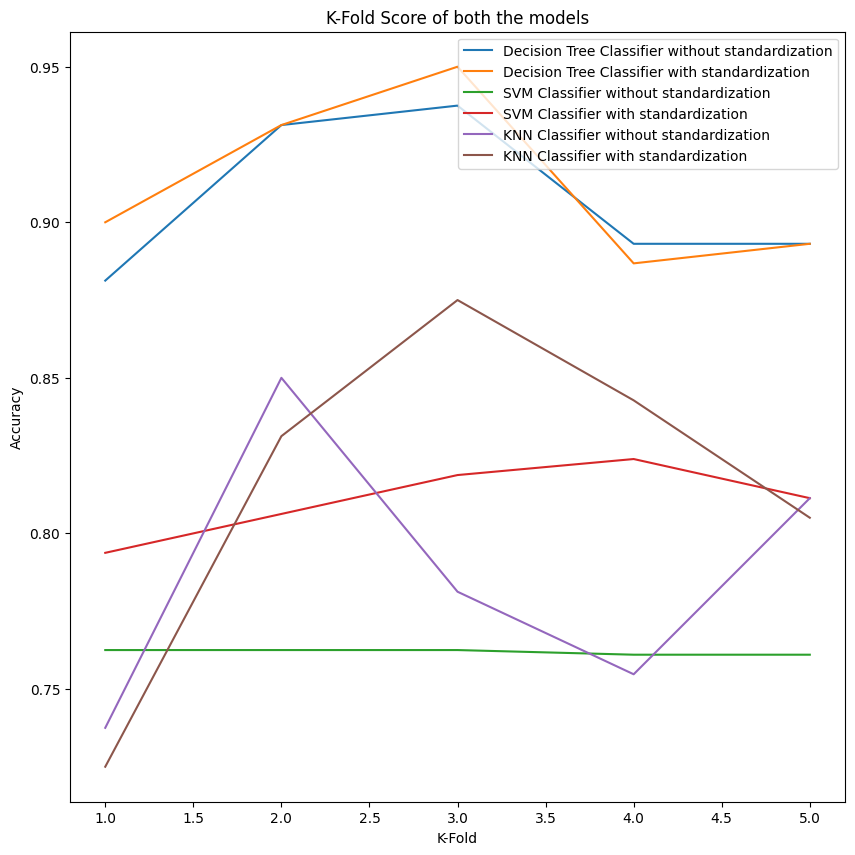

In [255]:
#plotting the k-fold score of both the models
plt.figure(figsize=(10,10))
plt.plot([1,2,3,4,5], dtc_cv, label='Decision Tree Classifier without standardization')
plt.plot([1,2,3,4,5], dtc_cv_st, label='Decision Tree Classifier with standardization')
plt.plot([1,2,3,4,5], svc_cv, label='SVM Classifier without standardization')
plt.plot([1,2,3,4,5], svc_cv_st, label='SVM Classifier with standardization')
plt.plot([1,2,3,4,5], knn_cv, label='KNN Classifier without standardization')
plt.plot([1,2,3,4,5], knn_cv_st, label='KNN Classifier with standardization')
plt.legend()
plt.xlabel('K-Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Score of both the models')
plt.show()


I am used Decision Tree and SVM and KNN classifier Because the dataset is not following normal distribution and continuous in certaiin columns that's why i have not used Naive Bayes.Since,Decision Tree can work on any type of datset and performs good on discrete data. I have performed the 5-fold cross validation and Decision Tree is significantly performing better than SVM and KNN as we can see in the graph also.
Since the SVM performs better on the continous data so it is performing better on Standardized data.
KNN is performing better on the standardized data because it is a distance based algorithm and it is performing better on the data which is in the same scale.

part 4

In [256]:
#implementing principal component analysis from scratch
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
    # calculating covariance matrix from scratch
    def covariance_matrix(self, X):
        covariance_matrix = np.zeros((X.shape[1], X.shape[1]))
        for i in range(X.shape[1]):
            for j in range(X.shape[1]):
                covariance_matrix[i][j] = np.mean(X[:, i]*X[:, j])
        # print(covariance_matrix)
        return covariance_matrix
    # calculating eigen values and eigen vectors
    def eigen_values_vectors(self, X):
        covariance_matrix = self.covariance_matrix(X)
        eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
        # print(eigen_values)
        return eigen_values, eigen_vectors
    # fitting the data
    def fit(self, X):
        eigen_values, eigen_vectors = self.eigen_values_vectors(X)
        eigen_vectors = eigen_vectors.T
        indexs = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[indexs]
        eigen_vectors = eigen_vectors[indexs]
        self.components = eigen_vectors[0:self.n_components]
    # transforming the data
    def transform(self, X):
        return np.dot(X, self.components.T)
    # fitting and transforming the data
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
#reduce the dimensionality of the data
pca = PCA(n_components=2)
#converting the data into numpy array
X_data_pca = np.array(X_data_st)
X_data_pca = pca.fit_transform(X_data_pca)
#converting the data into pandas dataframe
X_data_pca = pd.DataFrame(X_data_pca)
X_data_pca.columns = ['PC1', 'PC2']
X_data_pca.head()

PC1       PC2
0 -1.189586 -1.214772
1 -1.351742  1.236660
2  1.482607  1.575161
3 -1.694692 -1.966681
4  0.721691 -1.859403

In [257]:
y_data = pd.DataFrame(y_data)
y_data.columns = ['class']
y_data.head()

class
1      2
2      2
3      2
4      2
5      2

part 5

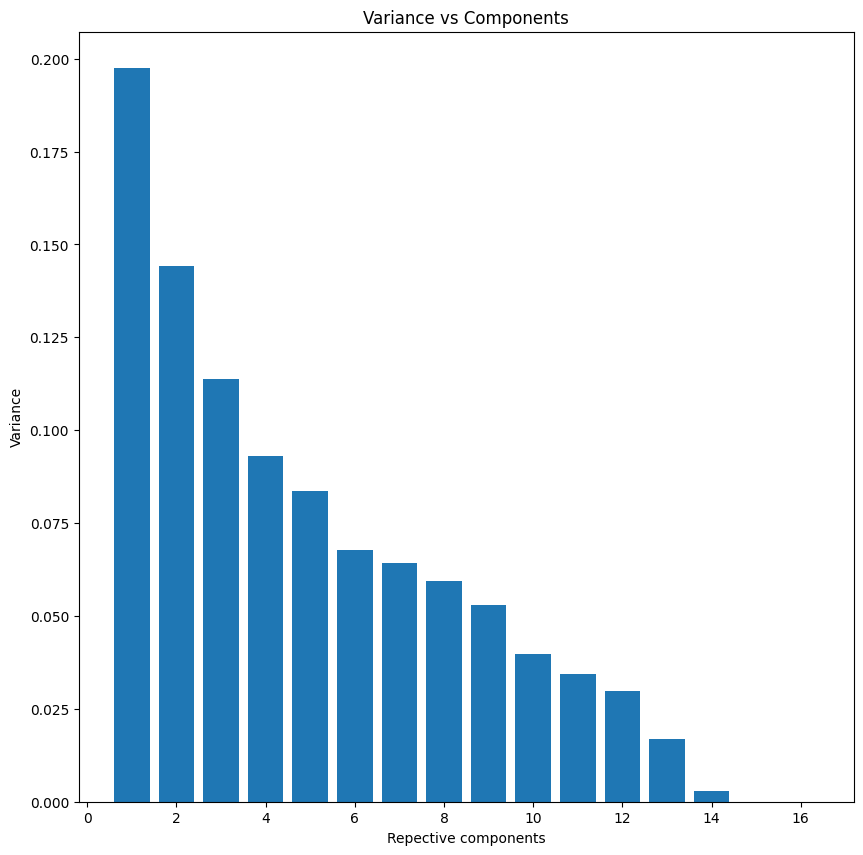

In [258]:
#varying the number of components and plotting the bar graph for change in variance
pca = PCA(n_components=16)
X_data_pca = np.array(X_data_st)
X_data_pca = pca.fit_transform(X_data_pca)
variance=pca.eigen_values_vectors(X_data_pca)[0]
variance=variance/sum(variance)
plt.figure(figsize=(10,10))
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], np.sort(variance)[::-1])
plt.xlabel('Repective components')
plt.ylabel('Variance')
plt.title('Variance vs Components')
plt.show()


In [259]:
#reduce the dimensionality of the data to best pca
pca = PCA(n_components=4)
#converting the data into numpy array
X_data_pca = np.array(X_data_st)
X_data_pca = pca.fit_transform(X_data_pca)
#converting the data into pandas dataframe
X_data_pca = pd.DataFrame(X_data_pca)
X_data_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4']
X_data_pca.head()

PC1       PC2       PC3       PC4
0 -1.189586 -1.214772 -0.047348  0.506077
1 -1.351742  1.236660 -0.169722  2.210719
2  1.482607  1.575161  0.414727  0.912963
3 -1.694692 -1.966681 -0.292086  0.287746
4  0.721691 -1.859403  0.312337 -0.590082

In [260]:
#calculating the eigen values and eigen vectors for the data
cov_mat = np.cov(X_data_pca.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print('Eigen values are: ', eigen_values)
print('Eigen vectors are: ', eigen_vectors)


Eigen values are:  [3.16192676 2.30849103 1.82404716 1.49238413]
Eigen vectors are:  [[ 1.00000000e+00 -4.49189418e-16 -6.43046182e-16  2.97533406e-16]
 [ 0.00000000e+00  1.00000000e+00 -6.01293542e-16  2.57366714e-16]
 [ 0.00000000e+00  1.33106849e-15  1.00000000e+00 -2.83946497e-15]
 [ 0.00000000e+00  2.46764978e-16  2.52504573e-15  1.00000000e+00]]


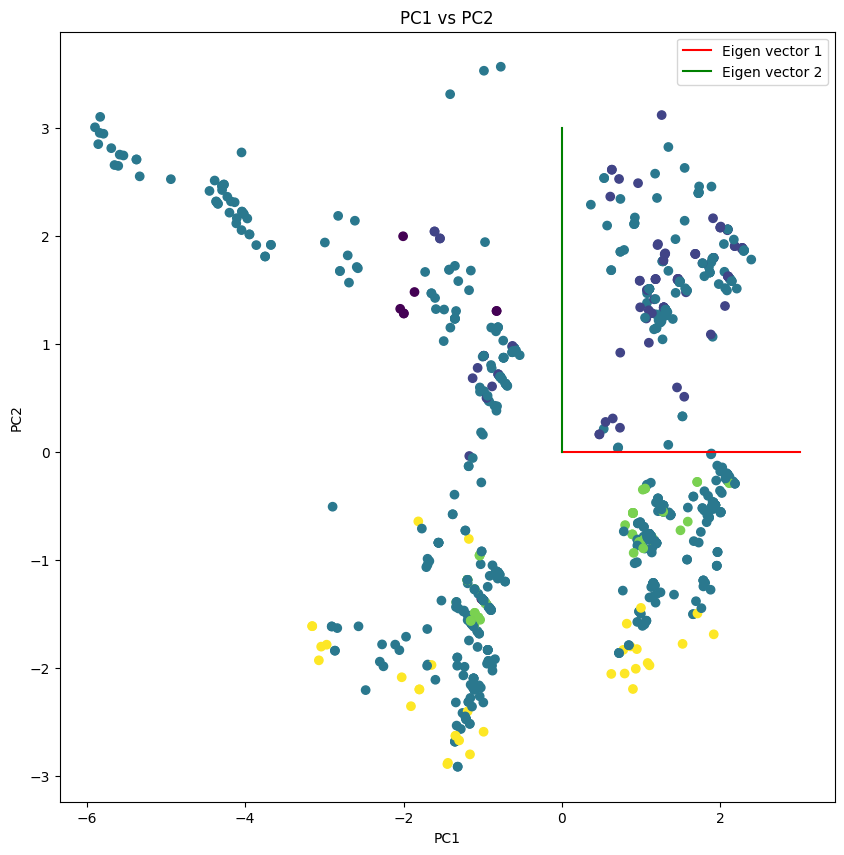

In [261]:
#plotting the two features with highest variance along with their eigen vectors
plt.figure(figsize=(10,10))
plt.scatter(X_data_pca['PC1'], X_data_pca['PC2'],c=y_data['class'])
plt.plot([0, 3*eigen_vectors[0][0]], [0, 3*eigen_vectors[0][1]], color='red', label='Eigen vector 1')
plt.plot([0, 3*eigen_vectors[1][0]], [0, 3*eigen_vectors[1][1]], color='green', label='Eigen vector 2')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()

part 6

In [262]:
#train test split of pca data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_data_pca, y_data, test_size=0.35, random_state=42)


In [263]:
#training the above models with the reduced data
dtc_pca = DecisionTreeClassifier()
svc_pca = SVC()
knn_pca = KNeighborsClassifier()

#calculating the 5-fold score of the above models
dtc_cv_pca = cross_val_score(dtc_pca, X_data_pca, y_data, cv=5)
print('5-fold score of Decision Tree Classifier with PCA is: ', dtc_cv_pca.mean())

svc_cv_pca = cross_val_score(svc_pca, X_data_pca, y_data, cv=5)
print('5-fold score of SVM Classifier with PCA is: ', svc_cv_pca.mean())

knn_cv_pca = cross_val_score(knn_pca, X_data_pca, y_data, cv=5)
print('5-fold score of KNN Classifier with PCA is: ', knn_cv_pca.mean())



5-fold score of Decision Tree Classifier with PCA is:  0.8407704402515723
5-fold score of SVM Classifier with PCA is:  0.7832075471698113
5-fold score of KNN Classifier with PCA is:  0.820809748427673


In [264]:
dtc_pca.fit(X_train_pca, y_train_pca)
svc_pca.fit(X_train_pca, y_train_pca)
knn_pca.fit(X_train_pca, y_train_pca)

#predicting the values for the above models
y_pred_dt_pca = dtc_pca.predict(X_test_pca)
y_pred_svm_pca = svc_pca.predict(X_test_pca)
y_pred_knn_pca = knn_pca.predict(X_test_pca)

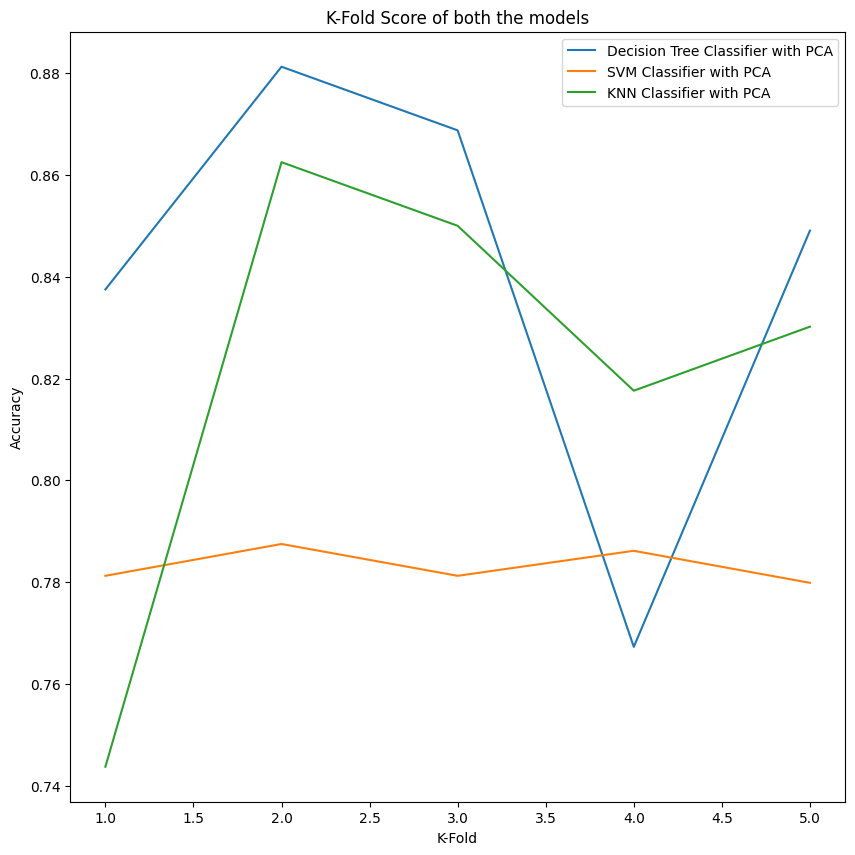

In [265]:
#plotting the graphs for the above models
plt.figure(figsize=(10,10))
plt.plot([1,2,3,4,5], dtc_cv_pca, label='Decision Tree Classifier with PCA')
plt.plot([1,2,3,4,5], svc_cv_pca, label='SVM Classifier with PCA')
plt.plot([1,2,3,4,5], knn_cv_pca, label='KNN Classifier with PCA')
plt.legend()
plt.xlabel('K-Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Score of both the models')
plt.show()

In [266]:
#importing the accuracy score,f1 score,precision score and recall score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [267]:
#test results of the models befor and after PCA using metrics accuracy score,f1 score,precision score and recall score
print('Accuracy score of Decision Tree Classifier before PCA is: ', accuracy_score(y_test, y_pred_dt_st))
print('Accuracy score of Decision Tree Classifier after PCA is: ', accuracy_score(y_test_pca, y_pred_dt_pca))
print('Accuracy score of SVM Classifier before PCA is: ', accuracy_score(y_test, y_pred_svm_st))
print('Accuracy score of SVM Classifier after PCA is: ', accuracy_score(y_test_pca, y_pred_svm_pca))
print('Accuracy score of KNN Classifier before PCA is: ', accuracy_score(y_test, y_pred_knn_st))
print('Accuracy score of KNN Classifier after PCA is: ', accuracy_score(y_test_pca, y_pred_knn_pca))



Accuracy score of Decision Tree Classifier before PCA is:  0.9214285714285714
Accuracy score of Decision Tree Classifier after PCA is:  0.7928571428571428
Accuracy score of SVM Classifier before PCA is:  0.8107142857142857
Accuracy score of SVM Classifier after PCA is:  0.7821428571428571
Accuracy score of KNN Classifier before PCA is:  0.8142857142857143
Accuracy score of KNN Classifier after PCA is:  0.8107142857142857


In [268]:
print('F1 score of Decision Tree Classifier before PCA is: ', f1_score(y_test, y_pred_dt_st, average='weighted'))
print('F1 score of Decision Tree Classifier after PCA is: ', f1_score(y_test_pca, y_pred_dt_pca, average='weighted'))
print('F1 score of SVM Classifier before PCA is: ', f1_score(y_test, y_pred_svm_st, average='weighted'))
print('F1 score of SVM Classifier after PCA is: ', f1_score(y_test_pca, y_pred_svm_pca, average='weighted'))
print('F1 score of KNN Classifier before PCA is: ', f1_score(y_test, y_pred_knn_st, average='weighted'))
print('F1 score of KNN Classifier after PCA is: ', f1_score(y_test_pca, y_pred_knn_pca, average='weighted'))

F1 score of Decision Tree Classifier before PCA is:  0.9184256089546594
F1 score of Decision Tree Classifier after PCA is:  0.7952030251412449
F1 score of SVM Classifier before PCA is:  0.7604572254467871
F1 score of SVM Classifier after PCA is:  0.6930287840814157
F1 score of KNN Classifier before PCA is:  0.805140630611219
F1 score of KNN Classifier after PCA is:  0.792405434740756


In [269]:
print('Precision score of Decision Tree Classifier before PCA is: ', precision_score(y_test, y_pred_dt_st, average='weighted'))
print('Precision score of Decision Tree Classifier after PCA is: ', precision_score(y_test_pca, y_pred_dt_pca, average='weighted'))
print('Precision score of SVM Classifier before PCA is: ', precision_score(y_test, y_pred_svm_st, average='weighted'))
print('Precision score of SVM Classifier after PCA is: ', precision_score(y_test_pca, y_pred_svm_pca, average='weighted'))
print('Precision score of KNN Classifier before PCA is: ', precision_score(y_test, y_pred_knn_st, average='weighted'))
print('Precision score of KNN Classifier after PCA is: ', precision_score(y_test_pca, y_pred_knn_pca, average='weighted'))

Precision score of Decision Tree Classifier before PCA is:  0.9185251732271857
Precision score of Decision Tree Classifier after PCA is:  0.7980740846938029
Precision score of SVM Classifier before PCA is:  0.7540368437451317
Precision score of SVM Classifier after PCA is:  0.7335174717368963
Precision score of KNN Classifier before PCA is:  0.8123562998160637
Precision score of KNN Classifier after PCA is:  0.7961747343565525


part 7

In [270]:
#function to find explained variance ratio of the data
def explained_variance_ratio(X_data):
    cov_matrix = np.cov(X_data.T)
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    total = sum(eigen_values)
    eigen_values = np.sort(eigen_values)[::-1]
    cum_var_exp = np.cumsum(eigen_values)/total
    return cum_var_exp*100

In [271]:
print(explained_variance_ratio(X_data_st))

[ 19.73727781  34.14726648  45.53327517  54.8489875   63.20950178
  69.97829661  76.3906718   82.32027394  87.61422709  91.58698885
  95.03154486  98.01595074  99.70539986 100.         100.
 100.        ]


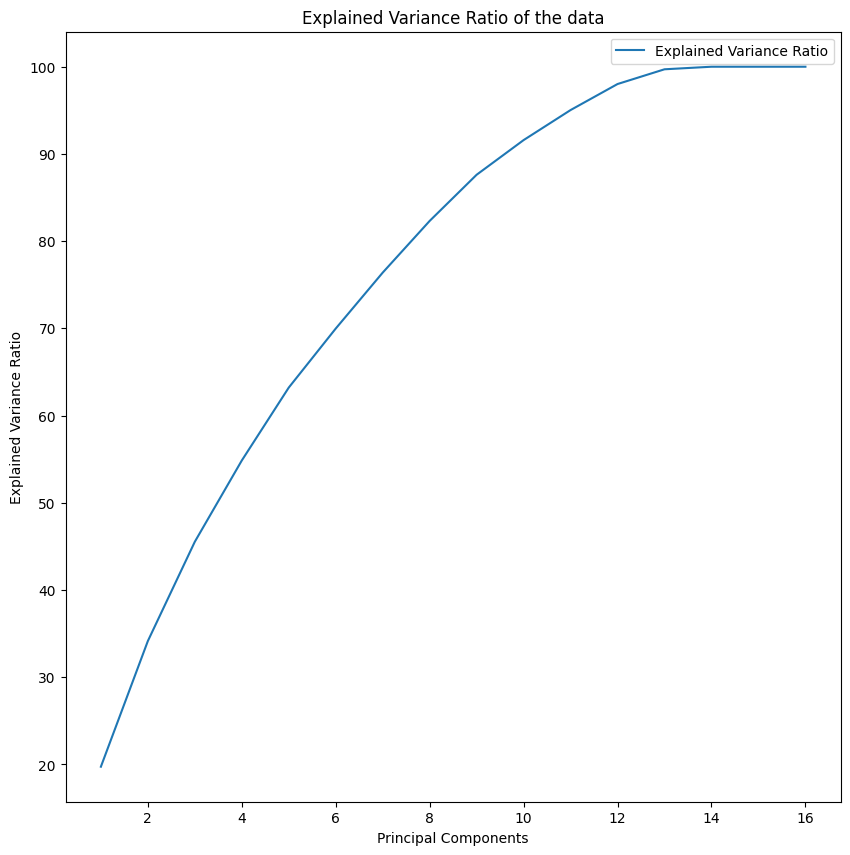

In [272]:
#plotting the graph for the explained variance ratio
plt.figure(figsize=(10,10))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], explained_variance_ratio(X_data_st), label='Explained Variance Ratio')
plt.legend()
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of the data')
plt.show()

I have used the method of cumulative sum of variance explained by the principal components and plotted the graph and found that 90% of the variance is explained by 10 principal components and intially there was 20 principal components and after applying PCA the number of principal components reduced to 10. So we can say that after applying PCA the number of features reduced to 10.

Bonus Question

On assuming naive bayes assummption the data has features independent of each other. So,matrix will be diagonal matrix,So its eigenvector will be of same basis.

In [273]:
#Assuming features to be independent making a correlation matrix
cov_mat = np.cov(X_data_st.T)
#filling all values except the diagonal with 0
for i in range(X_data_st.shape[1]):
    for j in range(X_data_st.shape[1]):
        if i!=j:
            cov_mat[i][j] = 0
print(cov_mat)


[[1.00125471 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.00125471 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.00125471 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.00125471 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.00125471 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.00125471
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.

In [274]:
#finding the eigen values and eigen vectors of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print(eigen_vectors)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [275]:
print(eigen_values)

[1.00125471 1.00125471 1.00125471 1.00125471 1.00125471 1.00125471
 1.00125471 1.00125471 1.00125471 1.00125471 1.00125471 1.00125471
 1.00125471 1.00125471 1.00125471 1.00125471]


In [276]:
#assuming the number of components to be 2 transforming the data
X_transformed = X_data_st.dot(eigen_vectors[:,:2])
print(X_transformed)

            0         1
0    0.327764 -0.477458
1   -0.261159 -0.477458
2   -0.261159 -0.477458
3   -0.261159  1.961015
4   -0.261159  1.961015
..        ...       ...
793 -0.261159  1.554602
794 -0.261159 -0.477458
795 -0.261159 -0.477458
796 -0.261159 -0.477458
797 -0.261159 -0.477458

[798 rows x 2 columns]


From here we can clearly see that on assuming naive bayes assumption the data will not be transformed or rotated. We can just selct the features with maximum covariance and ignore the rest of the features. The values of the features will not be changed.

QUESTION 2

In [277]:
data = pd.read_csv('wine.data', header=None)
#naming the columns
data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
#separating the data into X and y
X_data = data.iloc[:, 1:]
y_data = data.iloc[:, 0]


In [278]:
#preprocessing the data
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
X_data = pd.DataFrame(X_data)
X_data.columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X_data.head()


Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874

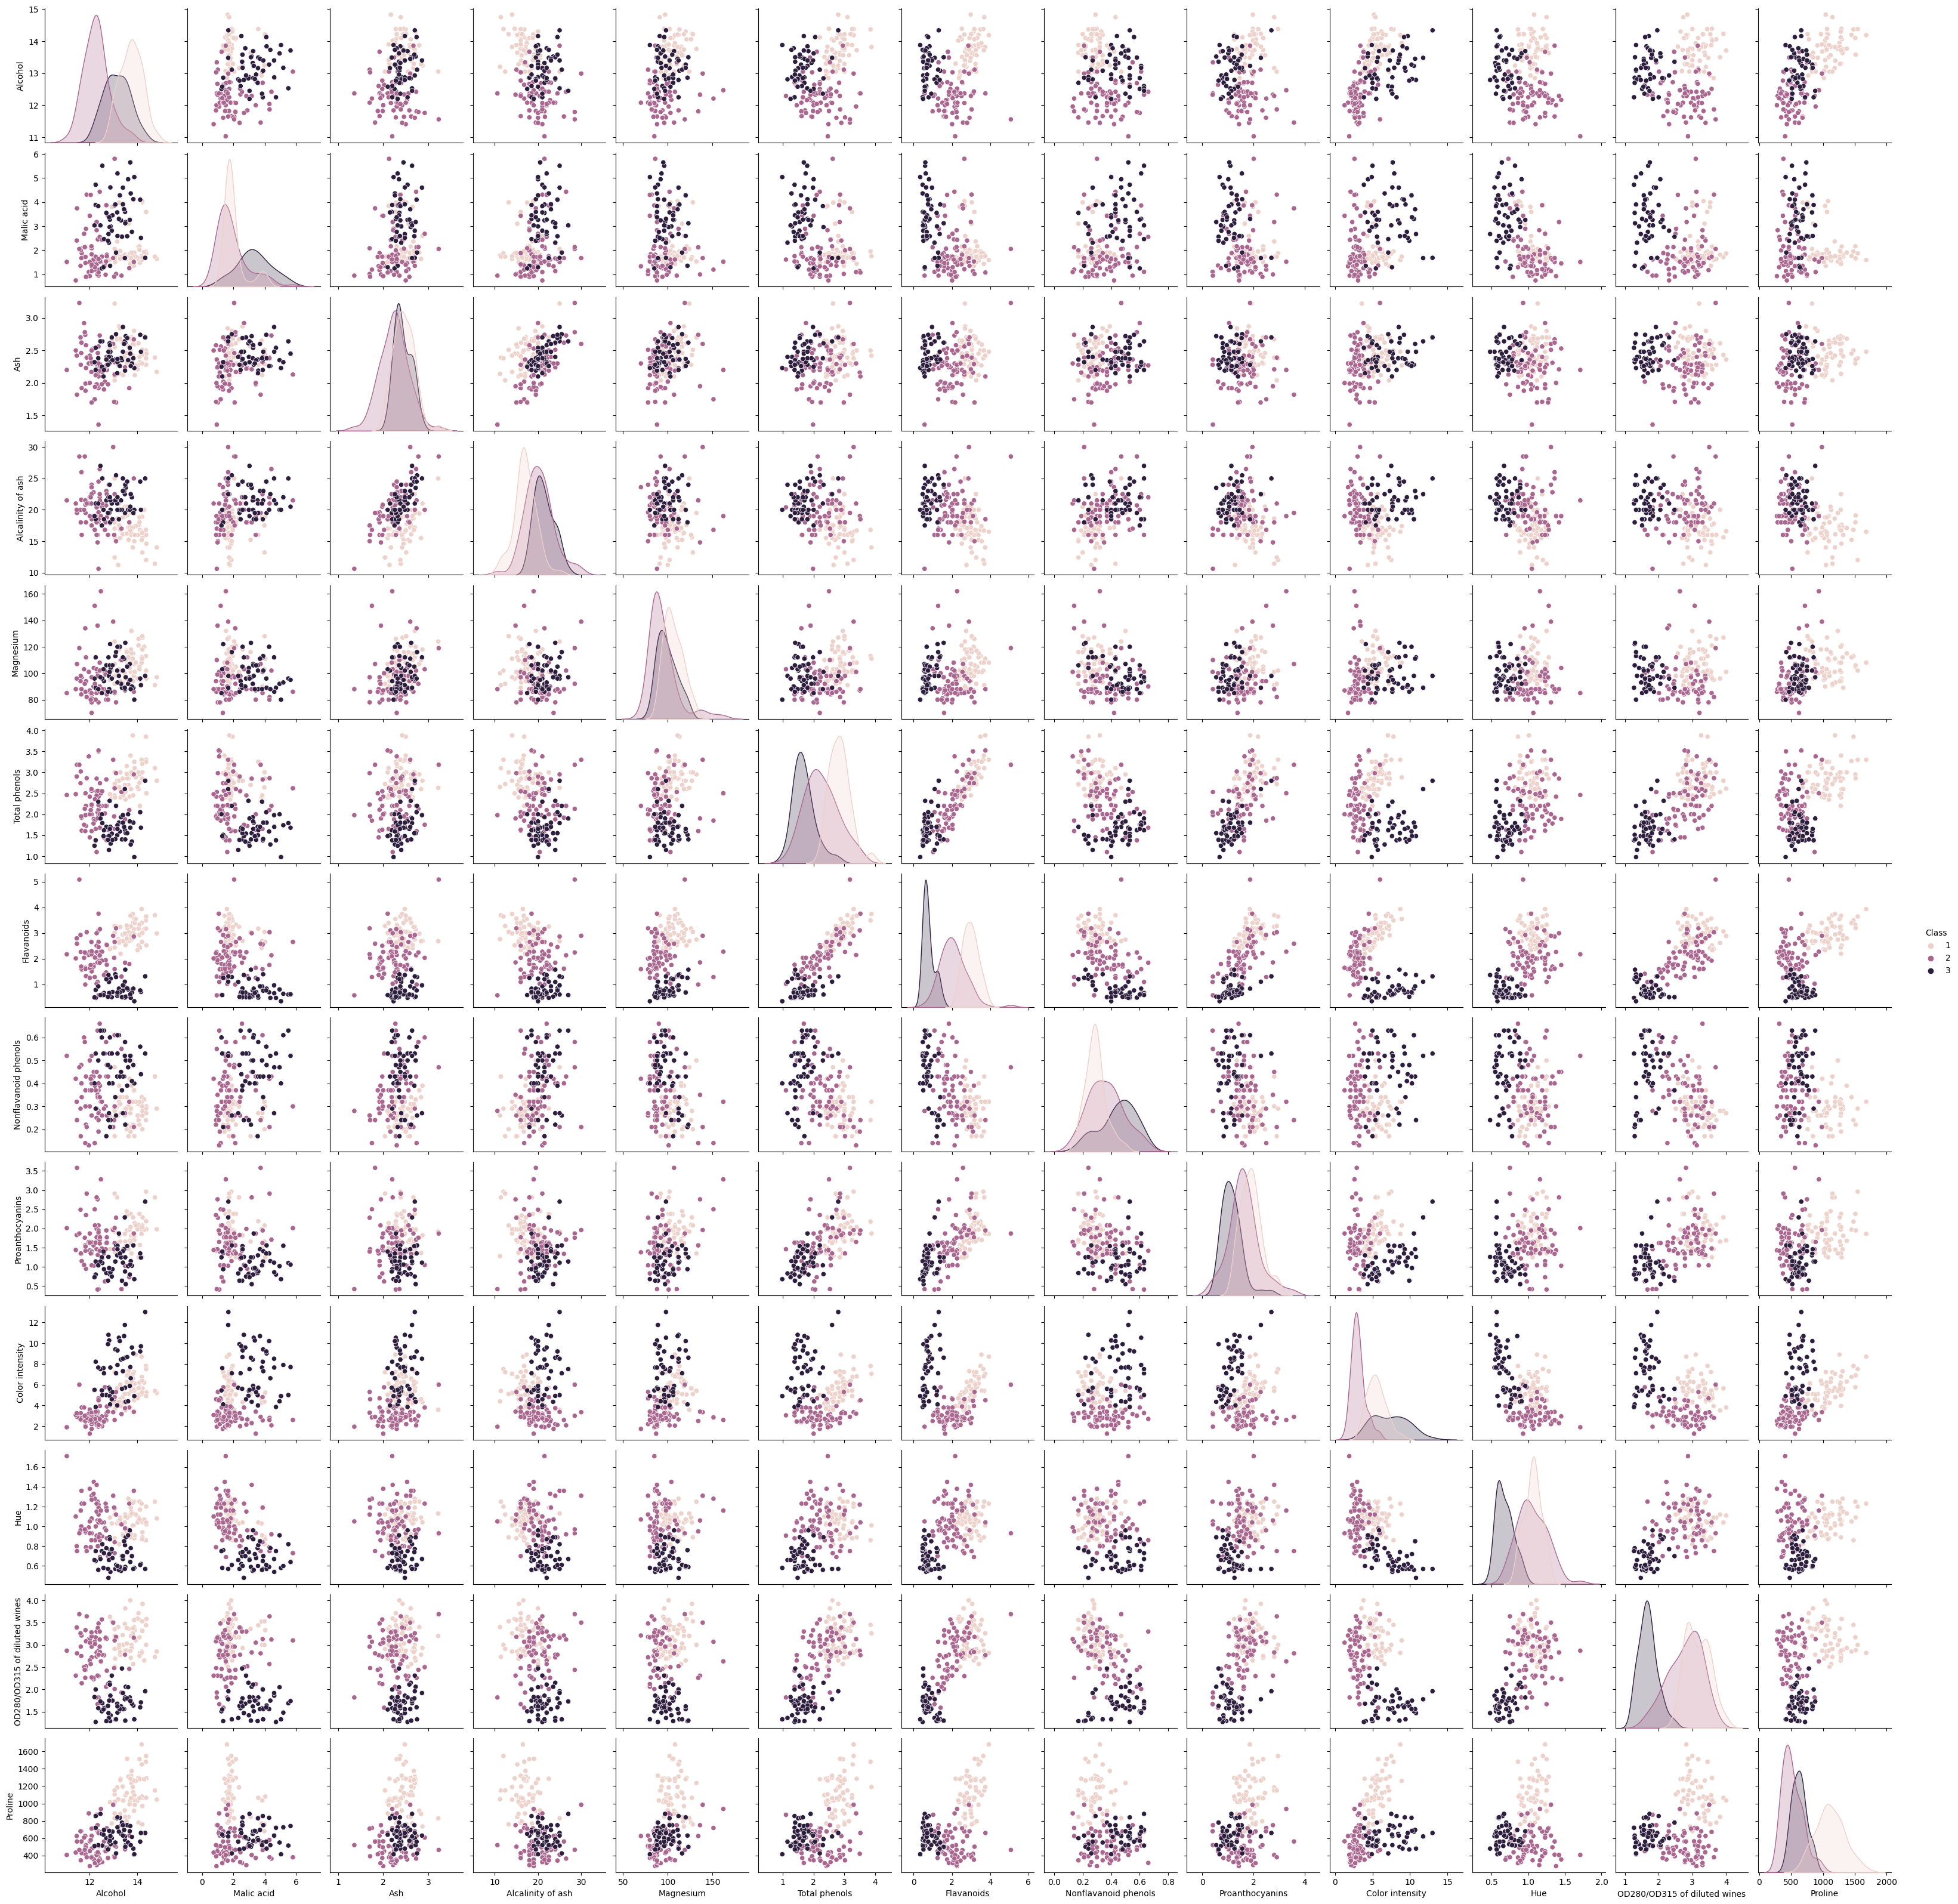

In [279]:
#plotting pairplot of the data
sns.pairplot(data, hue='Class')
plt.show()

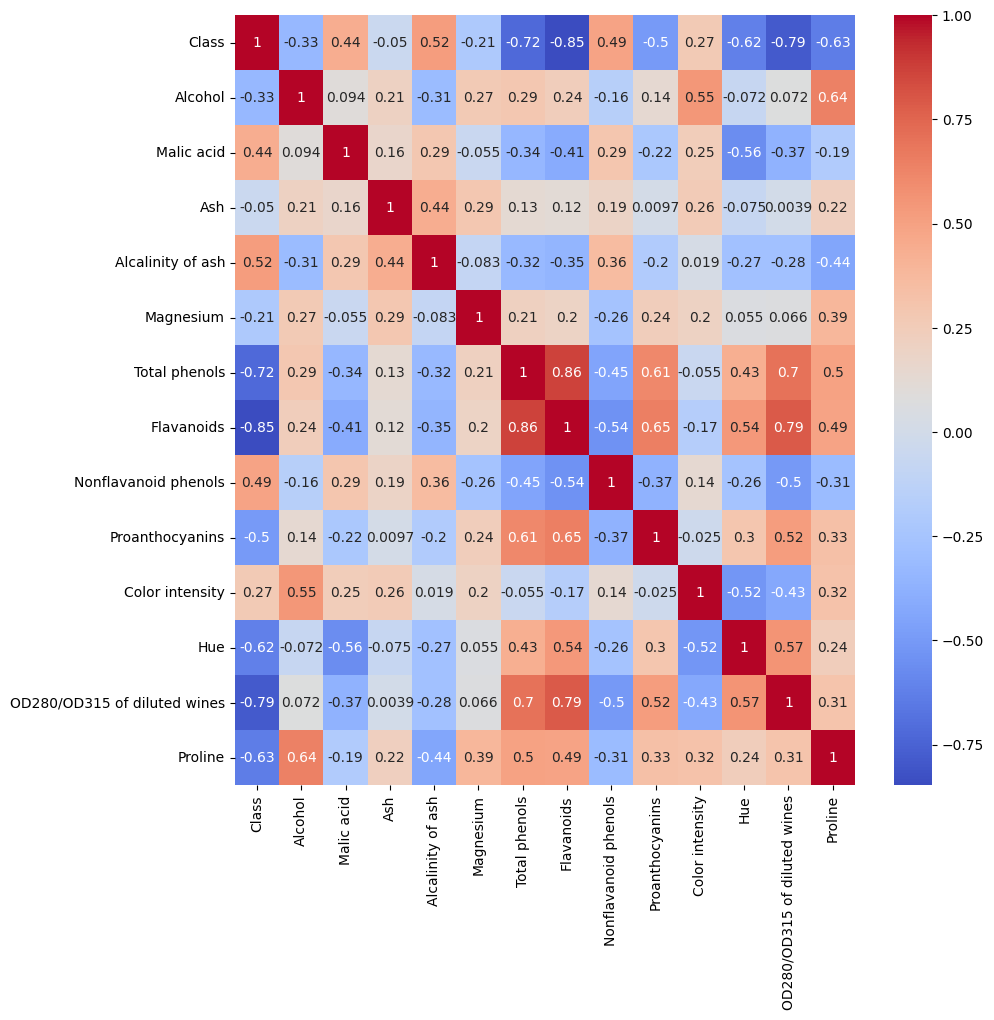

In [280]:
#plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [281]:
#implementing LDA from scratch as a class and giving the percentage of variance explained by the components
class LDA:
    def __init__(self, variance_explained):
        self.variance_explained = variance_explained
        self.linear_discriminants = None
    
    #function to calulate within class scatter matrix
    def _within_class_scatter_matrix(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        S_W = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot((X_c - mean_c))
        return S_W
    #function to calculate between class scatter matrix
    def _between_class_scatter_matrix(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0)
            n = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n * (mean_diff).dot(mean_diff.T)
        return S_B
    #function to select the linear discriminants on the basis of the variance explained
    def _select_linear_discriminants(self, eig_vals, eig_vecs):
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
        eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
        total = sum(eig_vals)
        # n_features = X.shape[1]
        var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
        cum_var_exp = np.cumsum(var_exp).real
        # print(cum_var_exp)
        n_components = 1
        for i in cum_var_exp:
            if i <= self.variance_explained:
                n_components += 1
            else:
                break
        if(n_components <1):
            n_components = 1
        # self.linear_discriminants = np.hstack((eig_pairs[0][1].reshape(n_features, 1), eig_pairs[1][1].reshape(n_features, 1)))
        self.linear_discriminants = np.array([eig_pairs[i][1] for i in range(n_components)]).real
    #function to fit the data
    def fit(self, X, y):
        S_W = self._within_class_scatter_matrix(X, y)
        S_B = self._between_class_scatter_matrix(X, y)
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        # print(np.sort(eig_vals)[::-1].real)
        self._select_linear_discriminants(eig_vals, eig_vecs)
    #function to transform the data
    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T).real


part 2

In [282]:
#appling LDA on the data
lda = LDA(variance_explained=99)
lda.fit(np.array(X_data), y_data)
X_data_lda = lda.transform(np.array(X_data))
print(X_data_lda.shape)
X_data_lda = pd.DataFrame(X_data_lda)
X_data_lda.columns = ['LD1', 'LD2']

(178, 2)


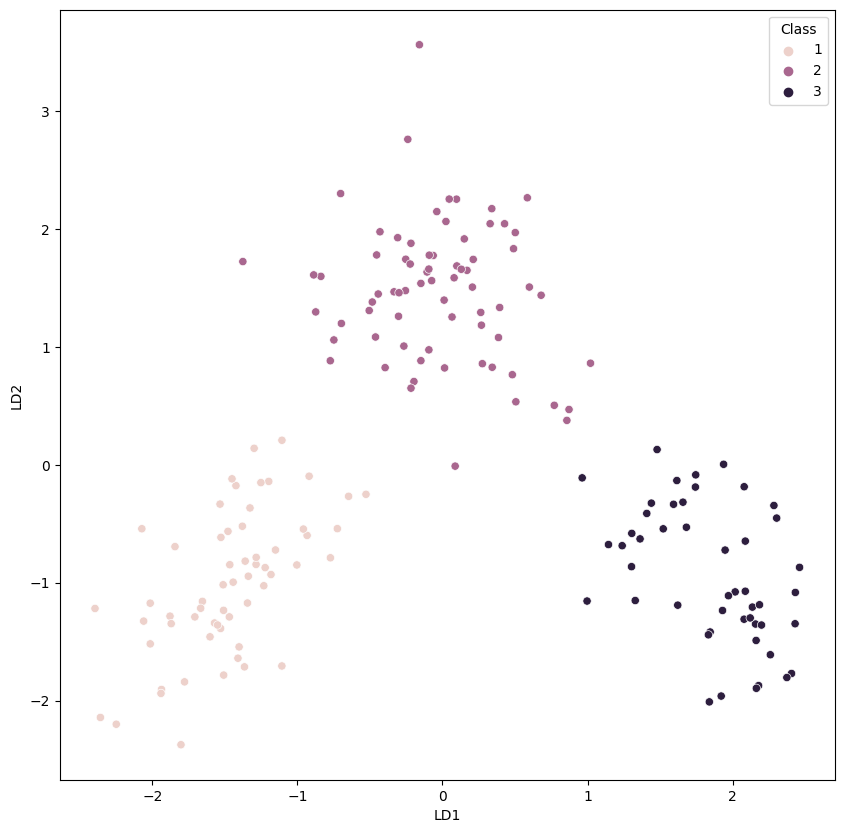

In [283]:
#plotting the data after applying LDA
plt.figure(figsize=(10,10))
sns.scatterplot(x='LD1', y='LD2', hue=y_data, data=X_data_lda)
plt.show()

In [284]:
#varying the variance explained by the components
variance_explain = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
n_components = []
for i in variance_explain:
    lda = LDA(variance_explained=i)
    lda.fit(np.array(X_data), y_data)
    X_data_lda = lda.transform(np.array(X_data))
    n_components.append(X_data_lda.shape[1])


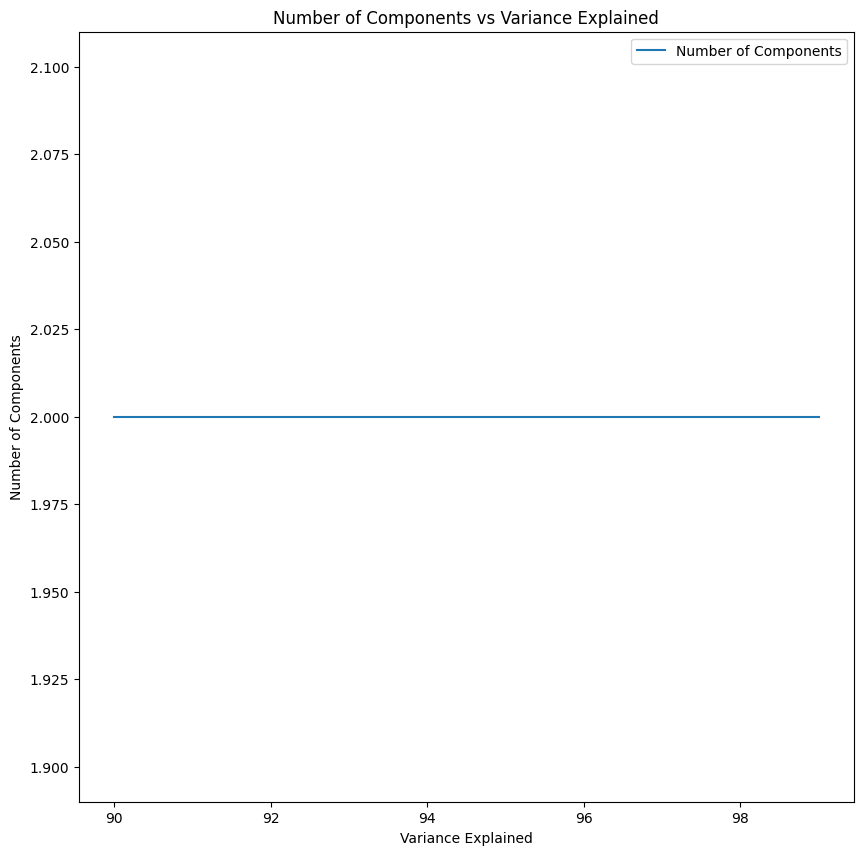

In [285]:
#plotting the graph for the number of components vs the variance explained
plt.figure(figsize=(10,10))
plt.plot(variance_explain, n_components, label='Number of Components')
plt.legend()
plt.xlabel('Variance Explained')
plt.ylabel('Number of Components')
plt.title('Number of Components vs Variance Explained') 
plt.show()

I have selected 2 LD as default and all the variance of the data is totally exxplained by 2 LDs.

part 3

In [286]:
#implementing LDA on data
lda = LDA(variance_explained=99)
lda.fit(np.array(X_data), y_data)
X_data_lda = lda.transform(np.array(X_data))
X_data_lda = pd.DataFrame(X_data_lda)
X_data_lda.columns = ['LD1', 'LD2']
X_data_lda.head()



LD1       LD2
0 -2.015464 -1.174075
1 -1.844679 -0.694318
2 -1.466804 -0.847779
3 -1.803427 -2.374604
4 -0.647480 -0.267677

In [287]:
#implementing PCA on the data
pca = PCA(n_components=2)

X_data_pca = pca.fit_transform(np.array(X_data))
X_data_pca = pd.DataFrame(X_data_pca)
X_data_pca.columns = ['PC1', 'PC2']
X_data_pca.head()

PC1       PC2
0 -3.316751  1.443463
1 -2.209465 -0.333393
2 -2.516740  1.031151
3 -3.757066  2.756372
4 -1.008908  0.869831

In [288]:
#train test split of both the data
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_data_lda, y_data, test_size=0.2, random_state=1)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_data_pca, y_data, test_size=0.2, random_state=5)

In [289]:
#comparing PCA and LDA using SVC , Decision Tree , KNN
dt = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()

dt_lda=dt.fit(X_train_lda, y_train_lda)
print('Decision Tree Accuracy with LDA: ', dt_lda.score(X_test_lda, y_test_lda))

dt_pca=dt.fit(X_train_pca, y_train_pca)
print('Decision Tree Accuracy with PCA: ', dt_pca.score(X_test_pca, y_test_pca))

svc_lda=svc.fit(X_train_lda, y_train_lda)
print('SVC Accuracy with LDA: ', svc_lda.score(X_test_lda, y_test_lda))

svc_pca=svc.fit(X_train_pca, y_train_pca)
print('SVC Accuracy with PCA: ', svc_pca.score(X_test_pca, y_test_pca))

knn_lda=knn.fit(X_train_lda, y_train_lda)
print('KNN Accuracy with LDA: ', knn_lda.score(X_test_lda, y_test_lda))

knn_pca=knn.fit(X_train_pca, y_train_pca)
print('KNN Accuracy with PCA: ', knn_pca.score(X_test_pca, y_test_pca))

Decision Tree Accuracy with LDA:  1.0
Decision Tree Accuracy with PCA:  0.9166666666666666
SVC Accuracy with LDA:  1.0
SVC Accuracy with PCA:  0.9444444444444444
KNN Accuracy with LDA:  1.0
KNN Accuracy with PCA:  0.9444444444444444


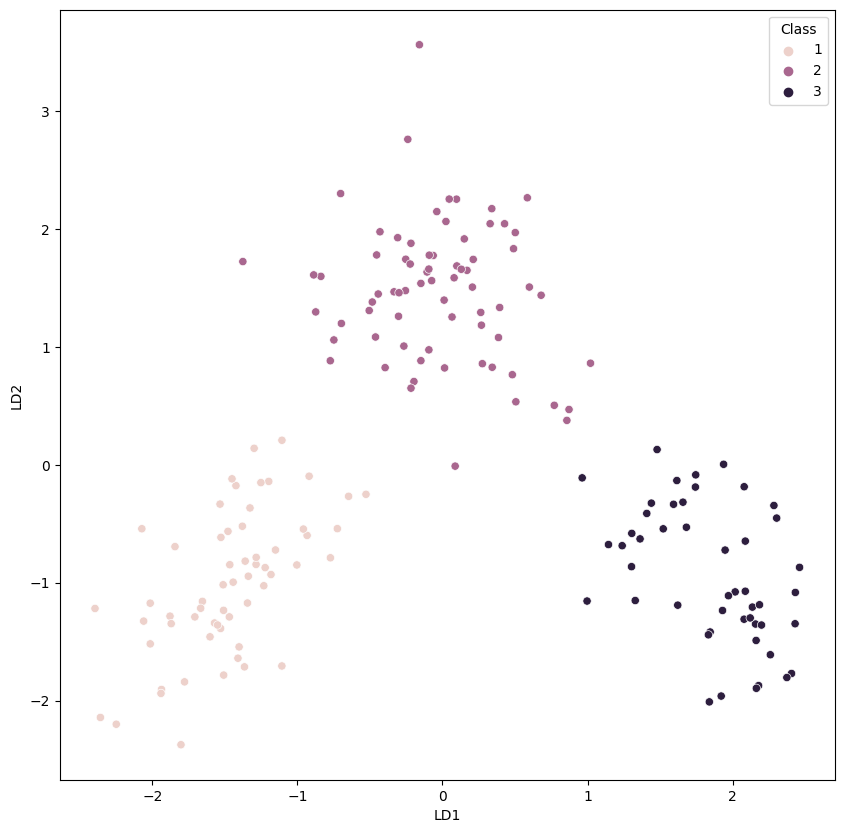

In [290]:
#plotting the scatter plot of the data after applying LDA
plt.figure(figsize=(10,10))
sns.scatterplot(x='LD1', y='LD2', hue=y_data, data=X_data_lda)
plt.show()


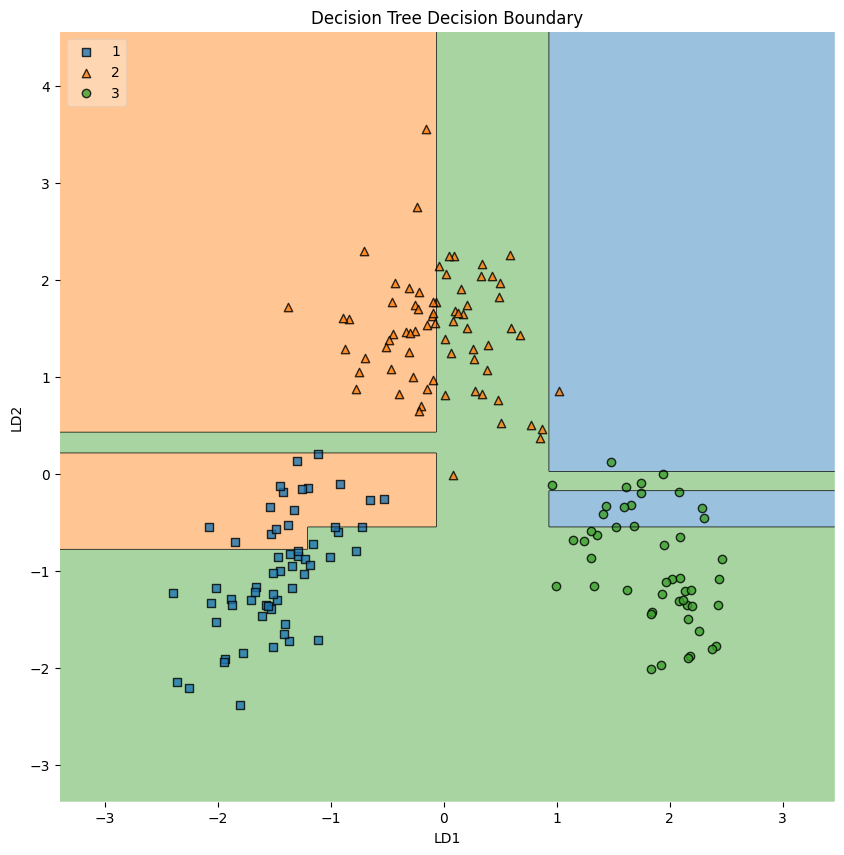

In [291]:
from mlxtend.plotting import plot_decision_regions
#plotting the decision boundary for LD1 and LD2
plt.figure(figsize=(10,10))
plot_decision_regions(X_data_lda.values, y_data.values, clf=dt_lda, legend=2)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Decision Tree Decision Boundary')
plt.show()

<AxesSubplot: >

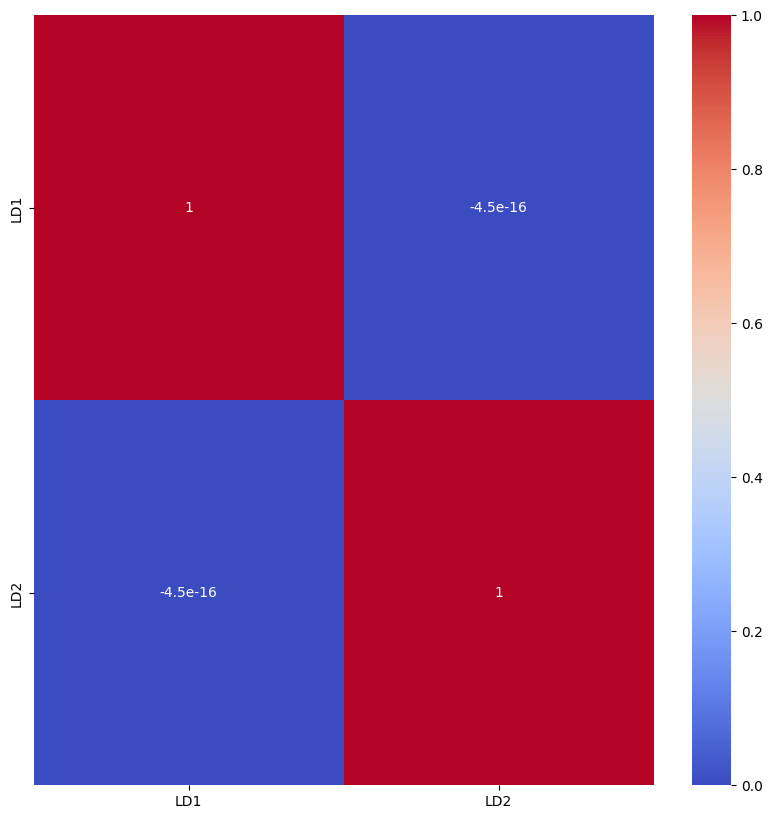

In [292]:
#plotting corelation matrix of the data after applying LDA
plt.figure(figsize=(10,10))
sns.heatmap(X_data_lda.corr(), annot=True, cmap='coolwarm')


In [293]:
#from above we can clearly see that the data is following the normal distribution so we can use Gaussian Naive Bayes to classify the data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_lda=gnb.fit(X_train_lda, y_train_lda)
print('Accuracy with LDA: ', gnb_lda.score(X_test_lda, y_test_lda))

Accuracy with LDA:  1.0


In [294]:
#function to perform k-fold cross validation from scratch
def k_fold_cross_validation(X, y, k, model):
    X = np.array(X)
    y = np.array(y)
    n = X.shape[0]
    fold_size = n//k
    accuracy = []
    for i in range(k):
        X_train = np.concatenate((X[:i*fold_size], X[(i+1)*fold_size:]), axis=0)
        y_train = np.concatenate((y[:i*fold_size], y[(i+1)*fold_size:]), axis=0)
        X_test = X[i*fold_size:(i+1)*fold_size]
        y_test = y[i*fold_size:(i+1)*fold_size]
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
    return accuracy

In [295]:
#performing k-fold cross validation on LDA
accuracy_lda = k_fold_cross_validation(X_data_lda, y_data, 5, gnb)
print('5-fold cross validation scores:',accuracy_lda)


5-fold cross validation scores: [1.0, 1.0, 1.0, 1.0, 1.0]


In [296]:
#replace the class 3 in y_train_lda and y_test_lda with 1 and 2 at random
y_train_lda = y_train_lda.replace(3, 1)

y_test_lda = y_test_lda.replace(3, 1)


Since to plot roc curve we need to select only one feature to set the threshold and we can't plot the roc curve for more than 1 features.And LD1 and significant are the only 1 LDs which are explaining the variance of the data.So we can drop LD1.

Accuracy with LDA:  0.9444444444444444


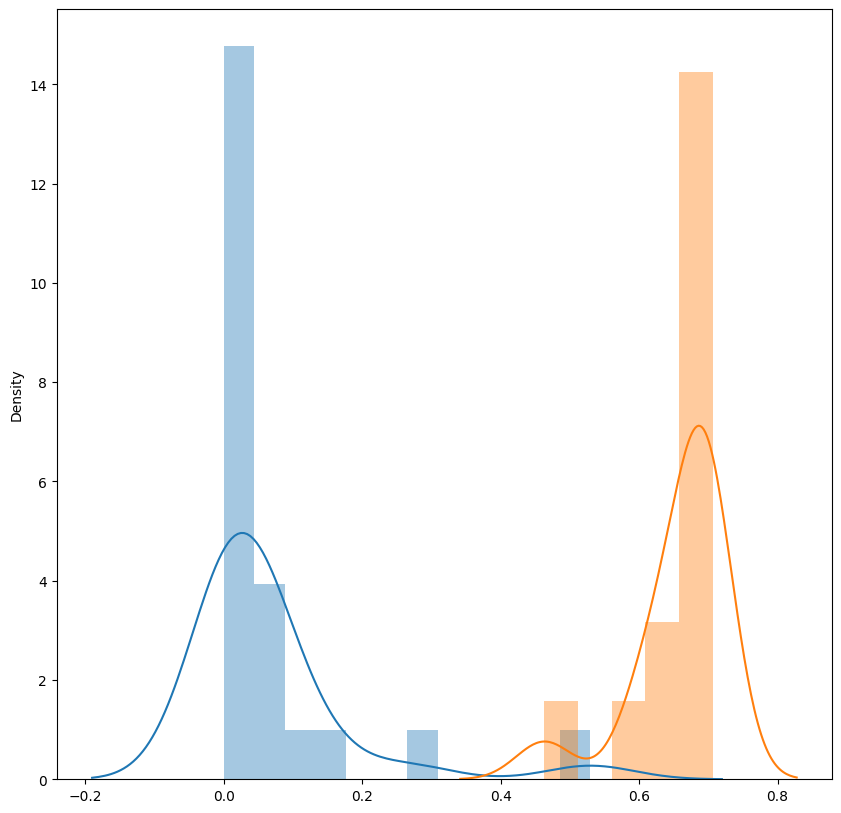

In [297]:
#drop the LD2 column from X_train_lda and X_test_lda
X_train_lda = X_train_lda.drop('LD2', axis=1)
X_test_lda = X_test_lda.drop('LD2', axis=1)

gnb_bin  = GaussianNB()
gnb_bin.fit(X_train_lda, y_train_lda)
y_pred_bin = gnb_bin.predict(X_test_lda)
y_pred_prob_bin = gnb_bin.predict_proba(X_test_lda)[:,1]
#print the score of gnb
print('Accuracy with LDA: ', gnb_bin.score(X_test_lda, y_test_lda))

#plot the gaussian distribution of the data
plt.figure(figsize=(10,10))
sns.distplot(y_pred_prob_bin[y_test_lda==1],  label='class1')
sns.distplot(y_pred_prob_bin[y_test_lda==2],  label='class2')
plt.show()

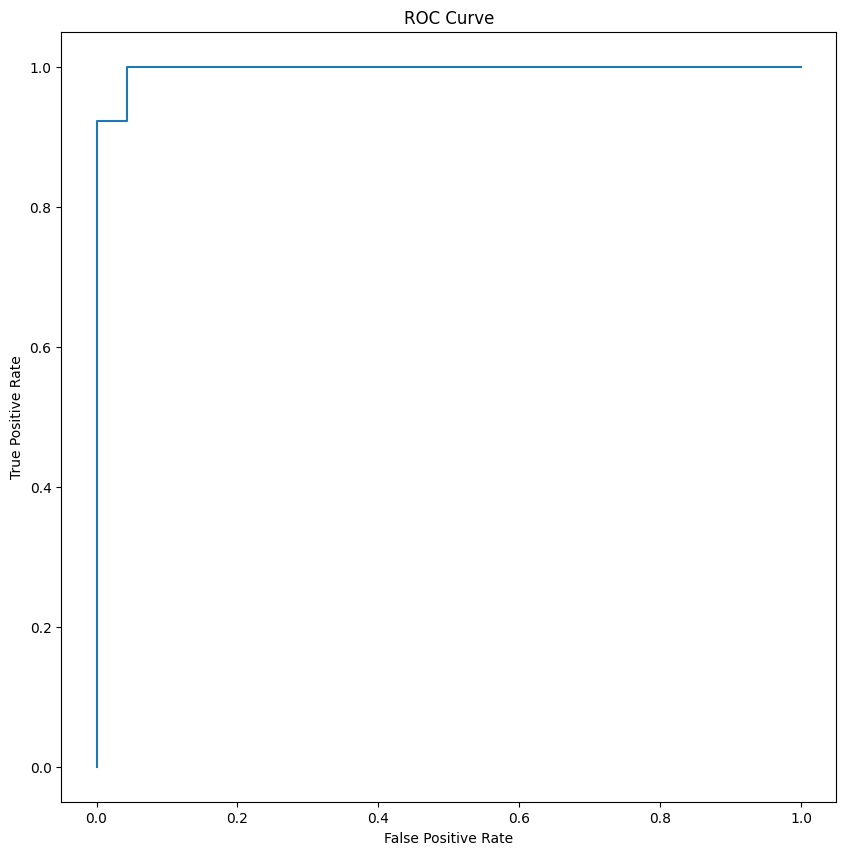

In [298]:
#since the data has only one feature we can change the threshold value step by step to change true positive and false positive
threshold = np.arange(0,1,0.01)
tpr = []
fpr = []
for i in threshold:
    y_pred_bin = np.where(y_pred_prob_bin>i, 1, 2)
    true_positive = np.equal(y_pred_bin, 2) & np.equal(y_test_lda,2)
    true_negative = np.equal(y_pred_bin, 1) & np.equal(y_test_lda, 1)
    false_positive = np.equal(y_pred_bin, 2) & np.equal(y_test_lda, 1)
    false_negative = np.equal(y_pred_bin, 1) & np.equal(y_test_lda, 2)
    tpr.append(1-(true_positive.sum() / (true_positive.sum() + false_negative.sum())))
    fpr.append(1-(false_positive.sum() / (false_positive.sum() + true_negative.sum())))

#plot the ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()




In [299]:
#fniding the area under the curve from scratch
def auc(fpr, tpr):
    auc = 0
    for i in range(len(fpr)-1):
        auc += (fpr[i+1]-fpr[i])*(tpr[i+1]+tpr[i])/2
    return auc
print('AUC score of data is :',abs(auc(fpr, tpr)))

AUC score of data is : 0.9966555183946488
